In [157]:
import numpy as np
import matplotlib.pyplot as plt


<Figure size 800x600 with 0 Axes>

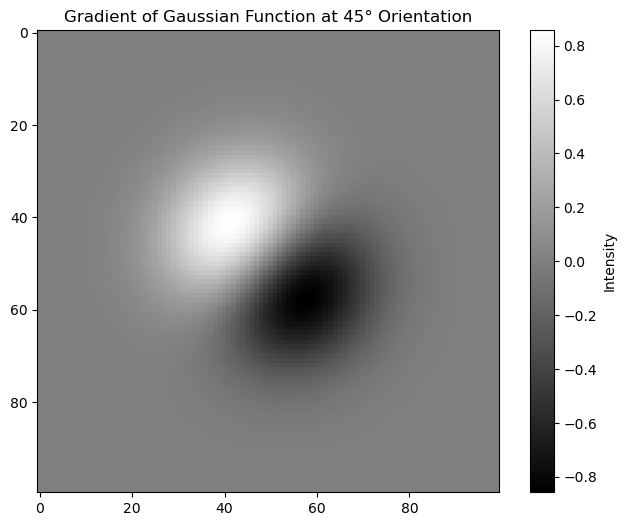

In [158]:
dims = [-3,3,100]
x = np.linspace(dims[0], dims[1], dims[2])
y = np.linspace(dims[0], dims[1], dims[2])
X, Y = np.meshgrid(x, y)
Gi = np.exp(-(X**2 + Y**2))
plt.figure(figsize=(8, 6))
# Signal and Noise angle generation
signal_angle = [-45, 45]  # only these 2 as it is a 2AFC task
noise_angle = np.random.normal(0, 30, 4)  # Generate noise angles with a mean of 0 and std deviation of 30
GiPrimex = -2 * X * Gi
GiPrimey = -2 * Y * Gi
math_angle = 45
perp_math_angle = math_angle + 90 
perceived_angle = -math_angle + 90
prefered_angle = np.deg2rad(45)
theta = np.deg2rad(math_angle)  # Example orientation in radians

GiPrimeTheta = np.cos(theta)*GiPrimex + np.sin(theta)*GiPrimey 
neuronFilter = np.cos(prefered_angle)*GiPrimex + np.sin(prefered_angle)*GiPrimey
plt.figure(figsize=(8, 6))
# Get the maximum absolute value for symmetric color scaling
vmax = np.max(np.abs(GiPrimeTheta))
plt.imshow(GiPrimeTheta, cmap='grey', vmin=-vmax, vmax=vmax)
plt.title(f'Gradient of Gaussian Function at {math_angle}° Orientation')
plt.colorbar(label='Intensity')
plt.show()

In [159]:
def matrix_dot_normal(matrix1, matrix2):
    """
    Calculate similarity between two matrices as a proportion (0-1).
    
    Parameters:
    matrix1, matrix2: numpy arrays of the same shape
    
    Returns:
    float: Similarity proportion (0-1) where 1 means identical
    """
    # Flatten matrices
    flat1 = matrix1.flatten()
    flat2 = matrix2.flatten()
    
    # Calculate cosine similarity
    dot_product = np.dot(flat1, flat2)
    # Calculate norms
    norm1 = np.linalg.norm(flat1)
    norm2 = np.linalg.norm(flat2)

    # Avoid division by zero
    if norm1 == 0 or norm2 == 0:
        return 0.0
        
    similarity = dot_product / (norm1 * norm2)
    
    return similarity
matrix_dot_normal(GiPrimeTheta,neuronFilter)

1.0000000000000002

In [160]:
"""
The next step is to convert this dot product to a neural firing rate.
The time frame in which the firing rate is arbitrary so lets just call it 1 second
The maximal firing rate is also a bit arbitrary 
but for physiological realism lets just call it like 20
and we want when the dot product is 1, that lambda = 20
and when the dot product is 0 we don't want much firing so we'll say that lambda has a minimum of 1
to keep things interesting
"""
lam = 19*matrix_dot_normal(GiPrimeTheta,neuronFilter)+1
np.random.poisson(lam)


17